# PDF File Analysis for Maliciousness Prediction

## Feature Engineering

### Feature Creation

In [1]:
#import necessary libraries
import pandas as pd
import json
import os

In [3]:
#Take the original json files and convert them into a more readable format
input_folder = 'benign'

output_folder = 'benign_cleaned'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for file_name in os.listdir(input_folder):
    if file_name.endswith('.json'):
        file_path = os.path.join(input_folder, file_name)

        with open(file_path, 'r') as json_file:
            loaded_data = json.load(json_file)

        static_properties_data = loaded_data.get('static_properties', {})
        yara_signatures_data = loaded_data.get('yara_signatures', [])

        features = {
            'file_size': loaded_data['file_size'],
            'pypdf_uris': len(loaded_data['pypdf_uris']),
            'regex_uris': len(loaded_data['regex_uris']),
            'regex_urls': len(loaded_data['regex_urls']),
            'scripts_iframe': len(loaded_data['scripts']['iframe']),
            'scripts_urls': len(loaded_data['scripts']['urls'])
        }

        for prop_name, prop_data in static_properties_data.items():
            features[f'static_property_{prop_name}'] = prop_data

        for signature in yara_signatures_data:
            features[f'yara_signature_{signature}'] = True

        output_file_path = os.path.join(output_folder, f'cleaned_{file_name}')
        with open(output_file_path, 'w') as output_file:
            json.dump(features, output_file, indent=4)

In [4]:
#Create a dataframe of the cleaned json file
folder_path = 'benign_cleaned'

dataframes = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):
        file_path = os.path.join(folder_path, file_name)

        with open(file_path, 'r') as json_file:
            loaded_data = json.load(json_file)

        df = pd.DataFrame([loaded_data])
        dataframes.append(df)

benign_merged_df = pd.concat(dataframes, ignore_index=True)

benign_merged_df['label'] = 0 #give label 0 for benign
benign_merged_df

,file_size,pypdf_uris,regex_uris,regex_urls,scripts_iframe,scripts_urls,static_property_JBIG2Decode,static_property_XML_forms,static_property_acro_form,static_property_auto_action,...,yara_signature_Big_Numbers3,yara_signature_MoleBoxv20,yara_signature_memory_shylock,yara_signature_header_evasion,yara_signature_IsSuspicious,yara_signature_multiple_filtering,yara_signature_FlateDecode_wrong_version,yara_signature_Big_Numbers4,yara_signature_suspicious_launch_action,label
0,99767,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,13957,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,164724,5,0,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,117527,0,0,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,364092,0,0,7,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,108717,0,0,12,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4998,664113,3,0,10,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4999,80742,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5000,15890122,0,0,16,0,0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
#Take the original json files and convert them into a more readable format
input_folder = 'malicious'

output_folder = 'malicious_cleaned'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for file_name in os.listdir(input_folder):
    if file_name.endswith('.json'):
        file_path = os.path.join(input_folder, file_name)

        with open(file_path, 'r') as json_file:
            loaded_data = json.load(json_file)

        static_properties_data = loaded_data.get('static_properties', {})
        yara_signatures_data = loaded_data.get('yara_signatures', [])

        features = {
            'file_size': loaded_data['file_size'],
            'pypdf_uris': len(loaded_data['pypdf_uris']),
            'regex_uris': len(loaded_data['regex_uris']),
            'regex_urls': len(loaded_data['regex_urls']),
            'scripts_iframe': len(loaded_data['scripts']['iframe']),
            'scripts_urls': len(loaded_data['scripts']['urls'])
        }

        for prop_name, prop_data in static_properties_data.items():
            features[f'static_property_{prop_name}'] = prop_data

        for signature in yara_signatures_data:
            features[f'yara_signature_{signature}'] = True

        output_file_path = os.path.join(output_folder, f'cleaned_{file_name}')
        with open(output_file_path, 'w') as output_file:
            json.dump(features, output_file, indent=4)

In [6]:
#Create a dataframe of the cleaned json file
folder_path = 'malicious_cleaned'

dataframes = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):
        file_path = os.path.join(folder_path, file_name)

        with open(file_path, 'r') as json_file:
            loaded_data = json.load(json_file)

        df = pd.DataFrame([loaded_data])
        dataframes.append(df)

malicious_merged_df = pd.concat(dataframes, ignore_index=True)

malicious_merged_df['label'] = 1 #give label 1 for malicious
malicious_merged_df

,file_size,pypdf_uris,regex_uris,regex_urls,scripts_iframe,scripts_urls,static_property_JBIG2Decode,static_property_XML_forms,static_property_acro_form,static_property_auto_action,...,yara_signature_without_urls,yara_signature_invalid_xref_numbers,yara_signature_possible_exploit,yara_signature_CRC32c_poly_Constant,yara_signature_RSharedStrings,yara_signature_xtreme_rat,yara_signature_suspicious_launch_action,yara_signature_suspicious_embed,yara_signature_PDF_Embedded_Exe,label
0,601330,34,34,41,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,39414,22,22,42,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,97690,5,5,5,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,107936,2,2,13,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,36382,22,22,22,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,34817,22,22,22,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4995,47330,22,22,22,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4996,44901,22,22,22,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4997,356987,32,32,38,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [7]:
#merge both dataframes to get the final dataframe
final_df = pd.concat([benign_merged_df, malicious_merged_df], ignore_index=True)
final_df

,file_size,pypdf_uris,regex_uris,regex_urls,scripts_iframe,scripts_urls,static_property_JBIG2Decode,static_property_XML_forms,static_property_acro_form,static_property_auto_action,...,yara_signature_suspicious_launch_action,label,yara_signature_suspicious_creator,yara_signature_Cerberus,yara_signature_possible_exploit,yara_signature_CRC32c_poly_Constant,yara_signature_RSharedStrings,yara_signature_xtreme_rat,yara_signature_suspicious_embed,yara_signature_PDF_Embedded_Exe
0,99767,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13957,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,164724,5,0,9,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,117527,0,0,1,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,364092,0,0,7,0,0,0,0,1,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,34817,22,22,22,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,47330,22,22,22,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,44901,22,22,22,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9999,356987,32,32,38,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#store the dataframe in a csv
final_df.to_csv('combined_features.csv', index=False)

### Data Cleaning

In [3]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('combined_features.csv')
df #read the dataframe

,file_size,pypdf_uris,regex_uris,regex_urls,scripts_iframe,scripts_urls,static_property_JBIG2Decode,static_property_XML_forms,static_property_acro_form,static_property_auto_action,...,yara_signature_suspicious_launch_action,label,yara_signature_suspicious_creator,yara_signature_Cerberus,yara_signature_possible_exploit,yara_signature_CRC32c_poly_Constant,yara_signature_RSharedStrings,yara_signature_xtreme_rat,yara_signature_suspicious_embed,yara_signature_PDF_Embedded_Exe
0,99767,0,0,0,0,0,0.0,0.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13957,0,0,0,0,0,0.0,0.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,164724,5,0,9,0,0,0.0,0.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,117527,0,0,1,0,0,0.0,0.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,364092,0,0,7,0,0,0.0,0.0,1.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,34817,22,22,22,0,0,0.0,0.0,0.0,0.0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,47330,22,22,22,0,0,0.0,0.0,0.0,0.0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,44901,22,22,22,0,0,0.0,0.0,0.0,0.0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9999,356987,32,32,38,0,0,0.0,0.0,0.0,0.0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
columns_null = df.columns[df.isnull().sum() > 7000]
df = df.drop(columns=columns_null) #drop all columns where the count of null values exceeds 7000

In [6]:
df = df.fillna(0) #fill the rest of the null values with 0
df

,file_size,pypdf_uris,regex_uris,regex_urls,scripts_iframe,scripts_urls,static_property_JBIG2Decode,static_property_XML_forms,static_property_acro_form,static_property_auto_action,...,static_property_stream_end,static_property_stream_start,static_property_trailer_dictionary,yara_signature_without_attachments,yara_signature_without_images,yara_signature_invalid_trailer_structure,yara_signature_contentis_base64,yara_signature_Big_Numbers1,yara_signature_with_urls,label
0,99767,0,0,0,0,0,0.0,0.0,0.0,0.0,...,23.0,23.0,1.0,True,True,True,True,True,0,0
1,13957,0,0,0,0,0,0.0,0.0,0.0,0.0,...,3.0,3.0,2.0,True,True,0,True,True,0,0
2,164724,5,0,9,0,0,0.0,0.0,0.0,0.0,...,14.0,14.0,2.0,True,True,0,True,True,True,0
3,117527,0,0,1,0,0,0.0,0.0,0.0,0.0,...,2.0,2.0,1.0,True,True,True,True,True,0,0
4,364092,0,0,7,0,0,0.0,0.0,1.0,0.0,...,333.0,333.0,0.0,True,True,True,True,True,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,34817,22,22,22,0,0,0.0,0.0,0.0,0.0,...,6.0,6.0,1.0,True,True,True,True,0,True,1
9997,47330,22,22,22,0,0,0.0,0.0,0.0,0.0,...,8.0,8.0,1.0,True,True,True,True,0,True,1
9998,44901,22,22,22,0,0,0.0,0.0,0.0,0.0,...,7.0,7.0,1.0,True,True,True,True,0,True,1
9999,356987,32,32,38,0,0,0.0,0.0,0.0,0.0,...,18.0,18.0,2.0,True,True,True,True,0,True,1


In [7]:
search_string = '-'

rows_with_string = df[df.eq(search_string).any(axis=1)] #find the rows where the string "-" appears
rows_with_string

,file_size,pypdf_uris,regex_uris,regex_urls,scripts_iframe,scripts_urls,static_property_JBIG2Decode,static_property_XML_forms,static_property_acro_form,static_property_auto_action,...,static_property_stream_end,static_property_stream_start,static_property_trailer_dictionary,yara_signature_without_attachments,yara_signature_without_images,yara_signature_invalid_trailer_structure,yara_signature_contentis_base64,yara_signature_Big_Numbers1,yara_signature_with_urls,label
6671,373494,31,31,37,0,0,0.0,0.0,0.0,0.0,...,18.0,18.0,2.0,True,True,True,True,0,True,1
6867,373494,31,31,37,0,0,0.0,0.0,0.0,0.0,...,18.0,18.0,2.0,True,True,True,True,0,True,1


In [8]:
search_string = '-'

columns_with_string = df.isin([search_string]).any()

columns_containing_string = columns_with_string[columns_with_string].index.tolist()
print(columns_containing_string) #find the column where this string exists

['static_property_file_size']


In [9]:
df = df.replace('-', 0) #replace "-" with 0
df = df.replace(True, 1) #replace True with 0
df['static_property_file_size'] = df['static_property_file_size'].astype(float) #convert column to float

In [10]:
df[:5000].describe() #first 5000 rows of dataframe

,file_size,pypdf_uris,regex_uris,regex_urls,scripts_iframe,scripts_urls,static_property_JBIG2Decode,static_property_XML_forms,static_property_acro_form,static_property_auto_action,...,static_property_stream_end,static_property_stream_start,static_property_trailer_dictionary,yara_signature_without_attachments,yara_signature_without_images,yara_signature_invalid_trailer_structure,yara_signature_contentis_base64,yara_signature_Big_Numbers1,yara_signature_with_urls,label
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.0
mean,4.696404e+06,13.880600,2.162000,83.080200,0.0,0.0,5.622200,0.000800,0.133400,0.131400,...,226.612800,227.230000,1.196800,0.484600,0.476800,0.171000,0.484400,0.44120,0.323000,0.0
std,2.280918e+07,104.857376,49.396119,477.268193,0.0,0.0,77.882341,0.028276,0.479636,1.372775,...,718.254288,718.608256,2.021803,0.499813,0.499511,0.376547,0.499807,0.49658,0.467669,0.0
min,1.360000e+03,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0
25%,2.023818e+05,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,15.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0
50%,5.390380e+05,0.000000,0.000000,5.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,38.000000,38.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0
75%,1.983498e+06,1.000000,0.000000,15.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,132.000000,132.250000,2.000000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000,0.0
max,6.097348e+08,3964.000000,3247.000000,14763.000000,0.0,0.0,4318.000000,1.000000,22.000000,69.000000,...,16405.000000,16405.000000,89.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.0


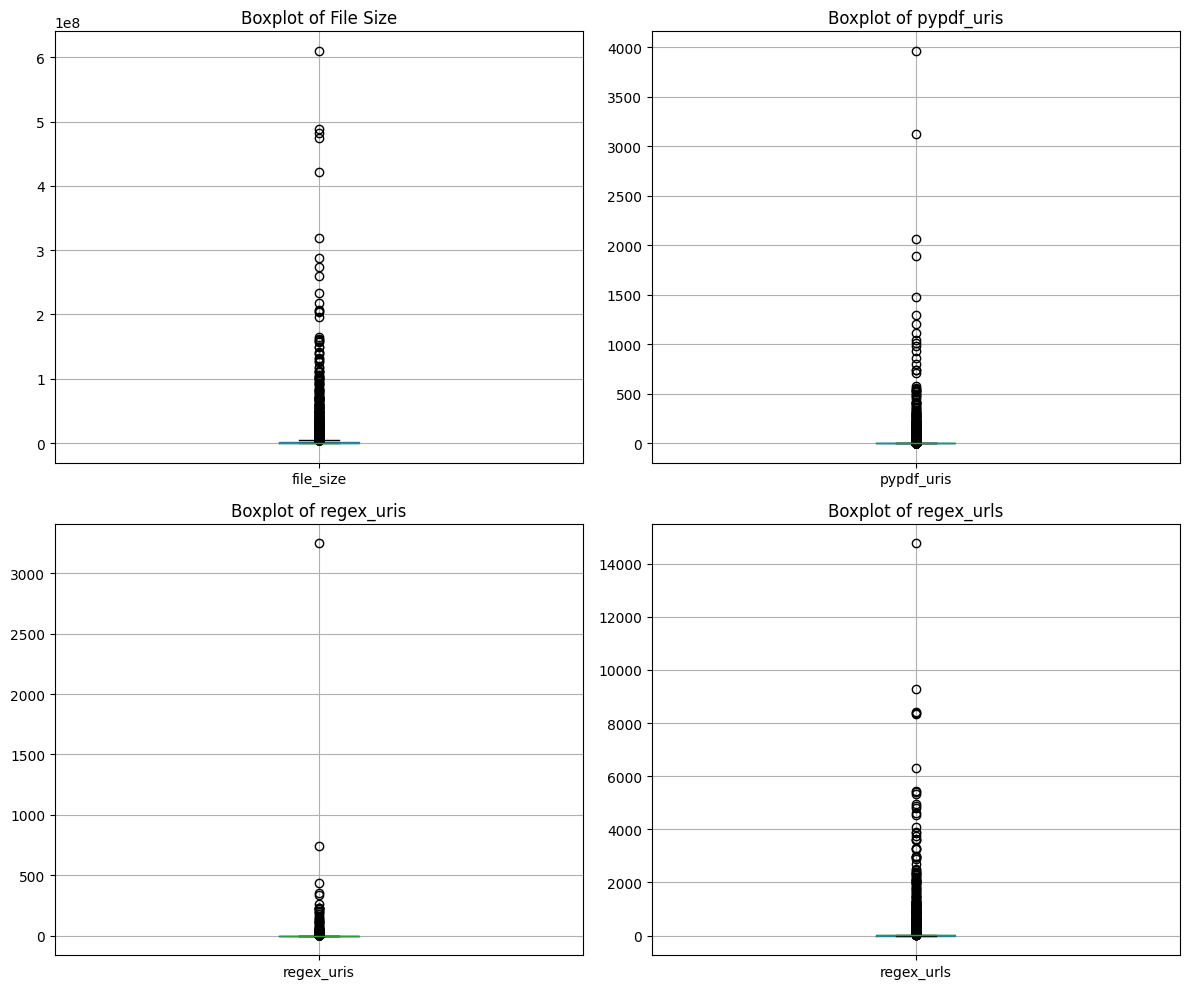

In [11]:
#boxplots of the below columns to find the outliers
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

df.iloc[:5000].boxplot(column=['file_size'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of File Size')

df.iloc[:5000].boxplot(column=['pypdf_uris'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of pypdf_uris')

df.iloc[:5000].boxplot(column=['regex_uris'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of regex_uris')

df.iloc[:5000].boxplot(column=['regex_urls'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of regex_urls')

plt.tight_layout()
plt.show()

In [12]:
#Remove all datapoints where 'regex_uris' > 3000
df.drop(df[(df['regex_uris'] > 3000) & (df['label'] == 0)].index, inplace=True)

In [13]:
df #dataframe

,file_size,pypdf_uris,regex_uris,regex_urls,scripts_iframe,scripts_urls,static_property_JBIG2Decode,static_property_XML_forms,static_property_acro_form,static_property_auto_action,...,static_property_stream_end,static_property_stream_start,static_property_trailer_dictionary,yara_signature_without_attachments,yara_signature_without_images,yara_signature_invalid_trailer_structure,yara_signature_contentis_base64,yara_signature_Big_Numbers1,yara_signature_with_urls,label
0,99767,0,0,0,0,0,0.0,0.0,0.0,0.0,...,23.0,23.0,1.0,1,1,1,1,1,0,0
1,13957,0,0,0,0,0,0.0,0.0,0.0,0.0,...,3.0,3.0,2.0,1,1,0,1,1,0,0
2,164724,5,0,9,0,0,0.0,0.0,0.0,0.0,...,14.0,14.0,2.0,1,1,0,1,1,1,0
3,117527,0,0,1,0,0,0.0,0.0,0.0,0.0,...,2.0,2.0,1.0,1,1,1,1,1,0,0
4,364092,0,0,7,0,0,0.0,0.0,1.0,0.0,...,333.0,333.0,0.0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,34817,22,22,22,0,0,0.0,0.0,0.0,0.0,...,6.0,6.0,1.0,1,1,1,1,0,1,1
9997,47330,22,22,22,0,0,0.0,0.0,0.0,0.0,...,8.0,8.0,1.0,1,1,1,1,0,1,1
9998,44901,22,22,22,0,0,0.0,0.0,0.0,0.0,...,7.0,7.0,1.0,1,1,1,1,0,1,1
9999,356987,32,32,38,0,0,0.0,0.0,0.0,0.0,...,18.0,18.0,2.0,1,1,1,1,0,1,1


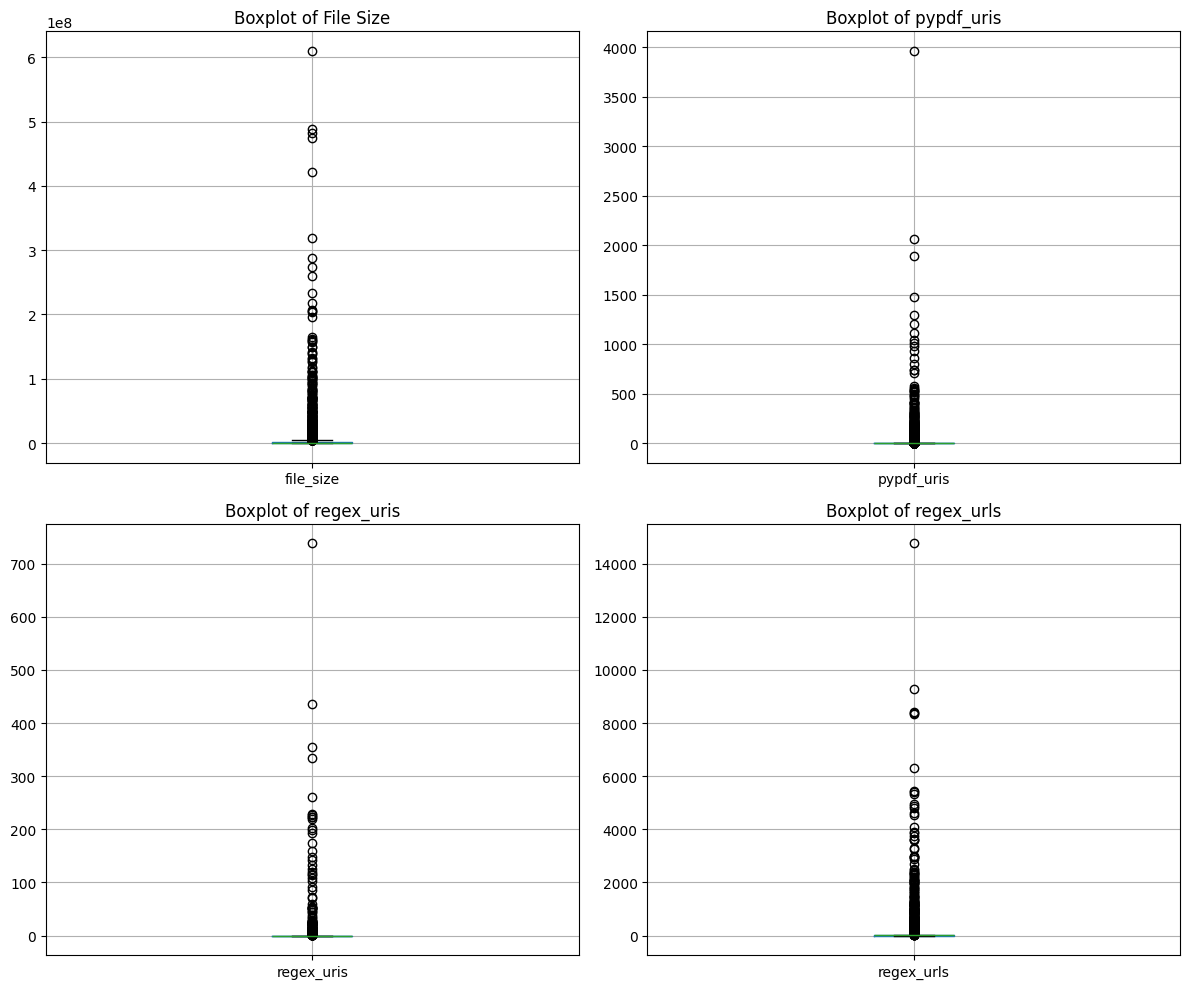

In [14]:
#replot the boxplots to see the removal of datapoints
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

df.iloc[:5000].boxplot(column=['file_size'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of File Size')

df.iloc[:5000].boxplot(column=['pypdf_uris'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of pypdf_uris')

df.iloc[:5000].boxplot(column=['regex_uris'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of regex_uris')

df.iloc[:5000].boxplot(column=['regex_urls'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of regex_urls')

plt.tight_layout()
plt.show()

In [15]:
df.to_csv('cleaned_combined_featuresV2.csv', index=False) #stored cleaned dataframe into another csv

### Exploratory Data Analysis (EDA)

In [16]:
#import necessary libraries
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [17]:
df.head() #top 5 rows

,file_size,pypdf_uris,regex_uris,regex_urls,scripts_iframe,scripts_urls,static_property_JBIG2Decode,static_property_XML_forms,static_property_acro_form,static_property_auto_action,...,static_property_stream_end,static_property_stream_start,static_property_trailer_dictionary,yara_signature_without_attachments,yara_signature_without_images,yara_signature_invalid_trailer_structure,yara_signature_contentis_base64,yara_signature_Big_Numbers1,yara_signature_with_urls,label
0,99767,0,0,0,0,0,0.0,0.0,0.0,0.0,...,23.0,23.0,1.0,1,1,1,1,1,0,0
1,13957,0,0,0,0,0,0.0,0.0,0.0,0.0,...,3.0,3.0,2.0,1,1,0,1,1,0,0
2,164724,5,0,9,0,0,0.0,0.0,0.0,0.0,...,14.0,14.0,2.0,1,1,0,1,1,1,0
3,117527,0,0,1,0,0,0.0,0.0,0.0,0.0,...,2.0,2.0,1.0,1,1,1,1,1,0,0
4,364092,0,0,7,0,0,0.0,0.0,1.0,0.0,...,333.0,333.0,0.0,1,1,1,1,1,1,0


In [18]:
df.describe() #statistics of the whole dataframe

,file_size,pypdf_uris,regex_uris,regex_urls,scripts_iframe,scripts_urls,static_property_JBIG2Decode,static_property_XML_forms,static_property_acro_form,static_property_auto_action,...,static_property_stream_end,static_property_stream_start,static_property_trailer_dictionary,yara_signature_without_attachments,yara_signature_without_images,yara_signature_invalid_trailer_structure,yara_signature_contentis_base64,yara_signature_Big_Numbers1,yara_signature_with_urls,label
count,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.0,10000.0,10000.000000,10000.000000,10000.00000,10000.00000,...,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.406232e+06,16.463800,9.813400,52.42040,0.0,0.0,2.811200,0.000500,0.06720,0.06700,...,119.608200,119.924400,1.24250,0.735800,0.731700,0.538900,0.735600,0.307800,0.654200,0.499900
std,1.629054e+07,83.266661,16.936932,337.42177,0.0,0.0,55.140083,0.022356,0.34626,0.97345,...,527.843911,528.145828,1.47313,0.440928,0.443097,0.498509,0.441035,0.461606,0.475652,0.500025
min,8.160000e+02,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.933775e+04,0.000000,0.000000,5.00000,0.0,0.0,0.000000,0.000000,0.00000,0.00000,...,8.000000,8.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.589635e+05,5.000000,1.000000,15.00000,0.0,0.0,0.000000,0.000000,0.00000,0.00000,...,14.000000,14.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,5.642750e+05,22.000000,22.000000,25.00000,0.0,0.0,0.000000,0.000000,0.00000,0.00000,...,38.000000,39.000000,2.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,6.097348e+08,4174.000000,738.000000,14763.00000,0.0,0.0,4318.000000,1.000000,22.00000,69.00000,...,16405.000000,16405.000000,89.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


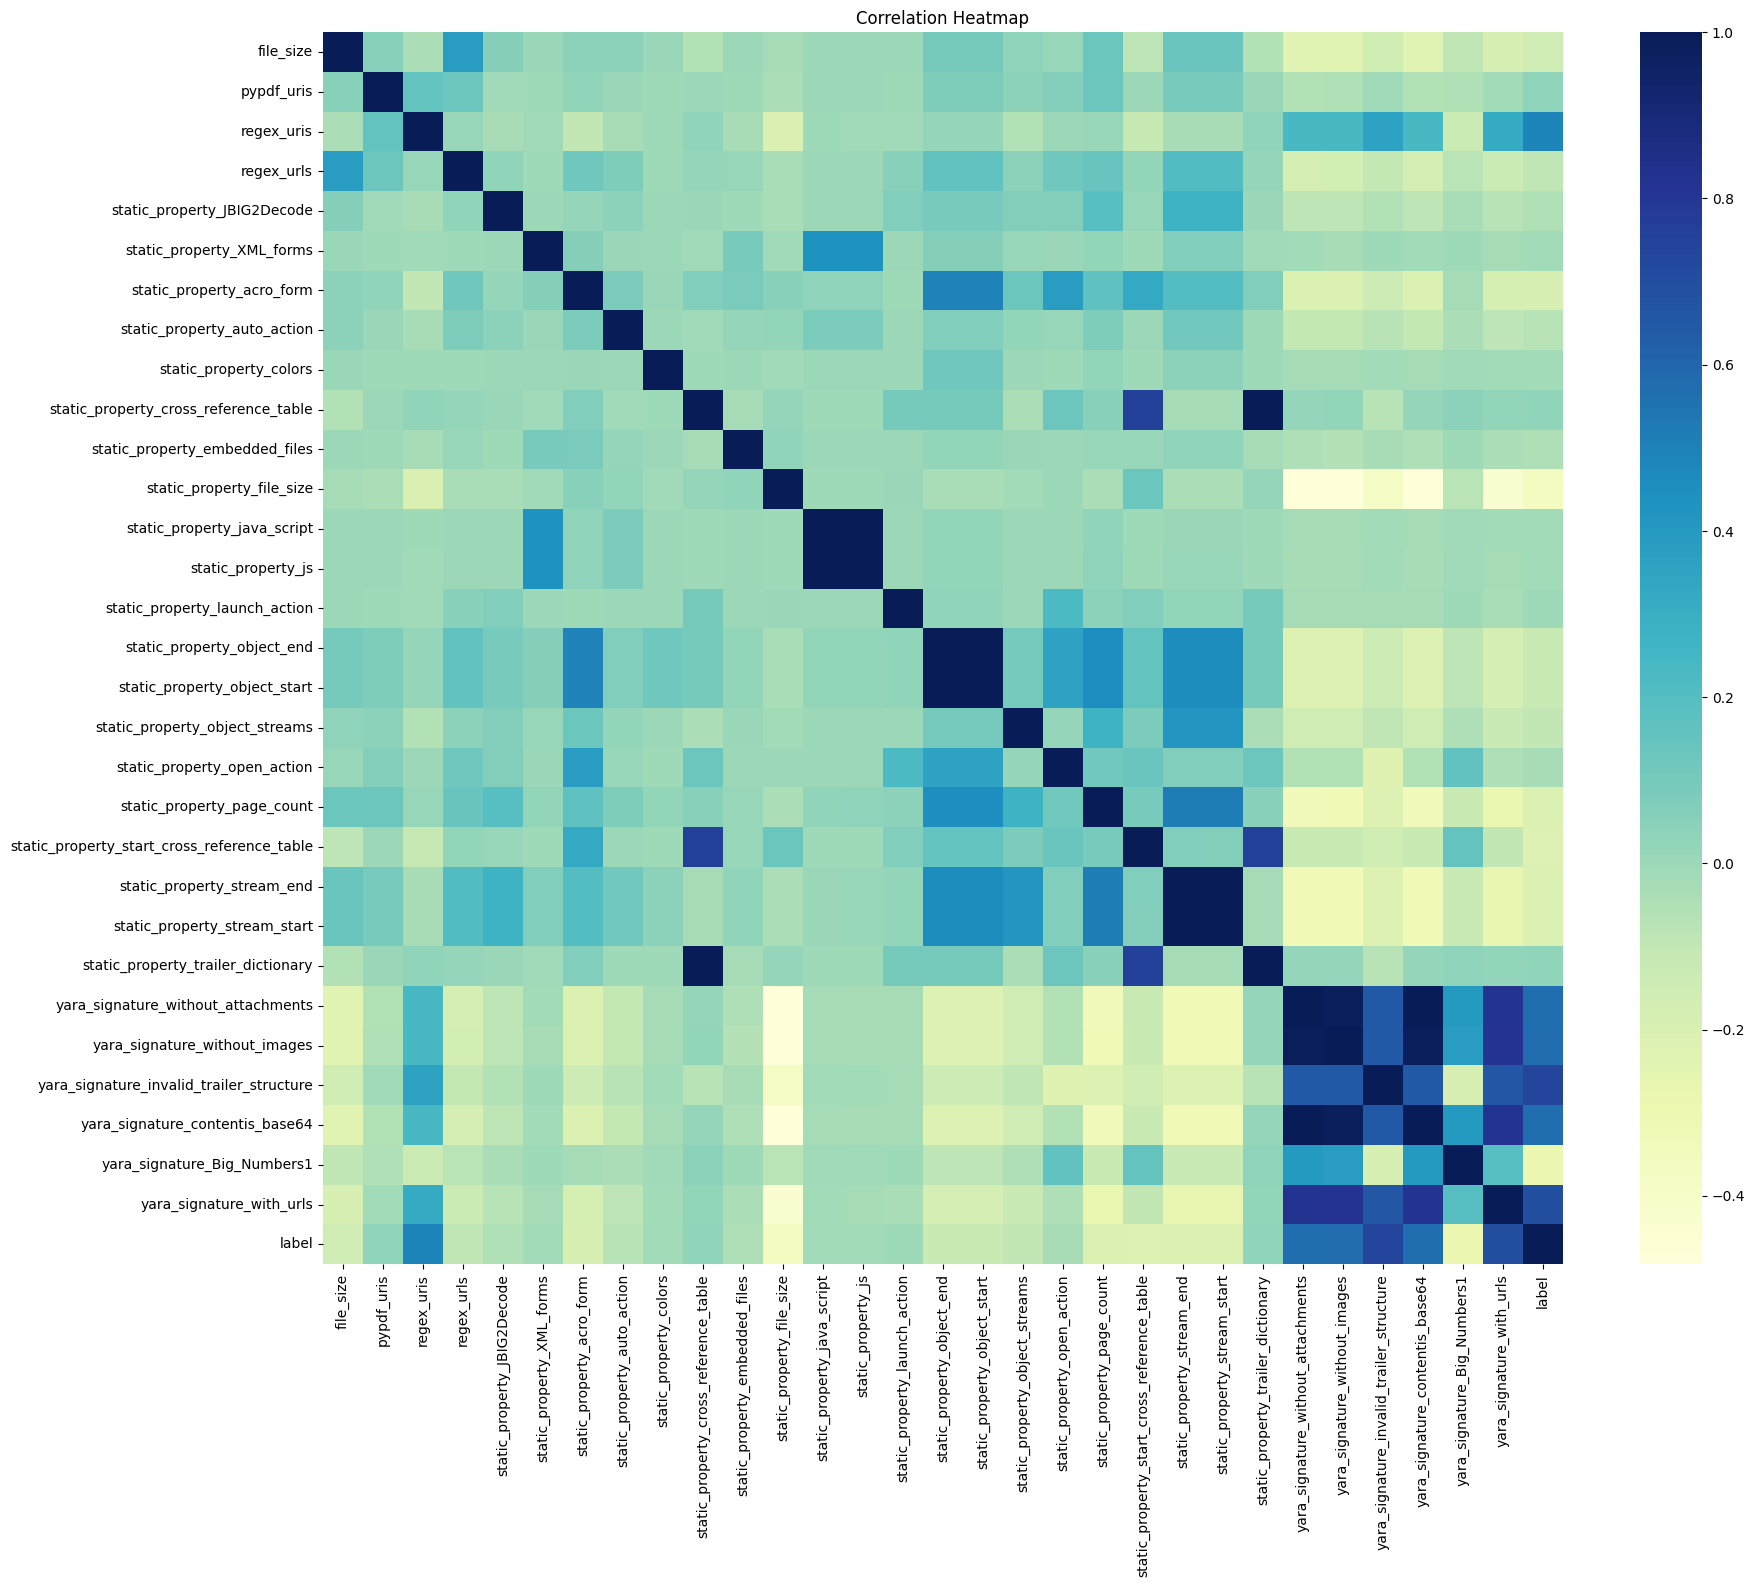

In [27]:
#plot the correlation heatmap
plt.figure(figsize=(20,16))
plt.title('Correlation Heatmap')
dataplot = sns.heatmap(df.drop(['scripts_iframe', 'scripts_urls', 'static_property_rich_media'], axis=1).corr(), cmap="YlGnBu")

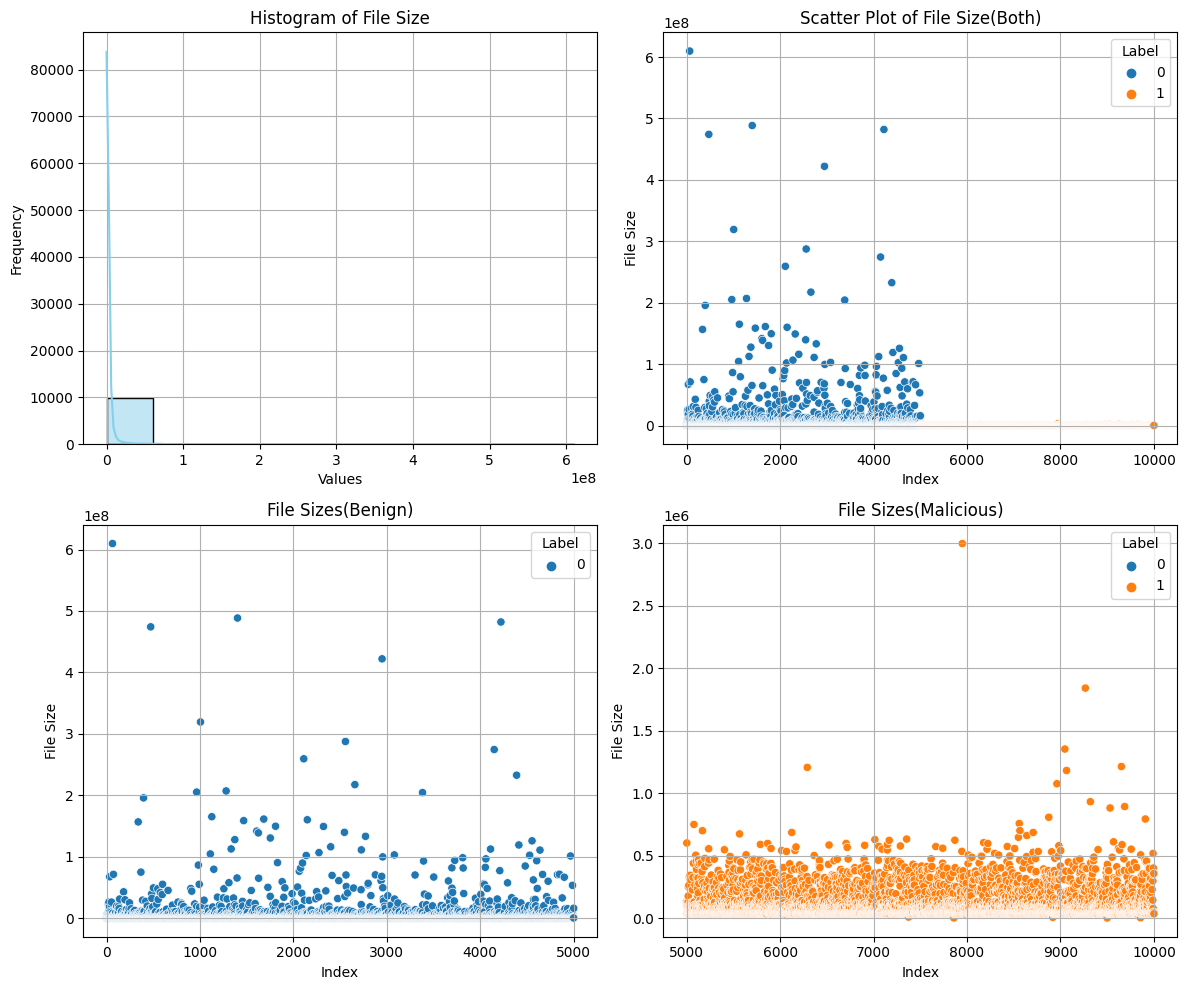

In [29]:
#plot 4 subplots corresponding to the first column that is file size.
#The first is a basic histogram.
#The next 3 are the data points plotted with their respective labels.
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogram of File Size
sns.histplot(ax=axes[0, 0], data=df.iloc[:, 0], bins=10, kde=True, color='skyblue')
axes[0, 0].set_xlabel('Values')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Histogram of File Size')
axes[0, 0].grid(True)

# All datapoints Scatter plot
sns.scatterplot(ax=axes[0, 1], x=df.index, y=df.iloc[:, 0], hue=df.iloc[:, -1])
axes[0, 1].set_xlabel('Index')
axes[0, 1].set_ylabel('File Size')
axes[0, 1].set_title('Scatter Plot of File Size(Both)')
axes[0, 1].legend(title='Label')
axes[0, 1].grid(True)

# First 5000 points Scatter plot
sns.scatterplot(ax=axes[1, 0], x=df.index[:5000], y=df.iloc[:5000, 0], hue=df.iloc[:5000, -1])
axes[1, 0].set_xlabel('Index')
axes[1, 0].set_ylabel('File Size')
axes[1, 0].set_title('File Sizes(Benign)')
axes[1, 0].legend(title='Label')
axes[1, 0].grid(True)

# Last 5000 points Scatter plot
sns.scatterplot(ax=axes[1, 1], x=df.index[-5000:], y=df.iloc[-5000:, 0], hue=df.iloc[-5000:, -1])
axes[1, 1].set_xlabel('Index')
axes[1, 1].set_ylabel('File Size')
axes[1, 1].set_title('File Sizes(Malicious)')
axes[1, 1].legend(title='Label')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

It can be seen through the above 4 plots, that on the basis of file sizes there is a clear demarcation of the maliciousness of the file. Hence this feature should be quite important during classification.

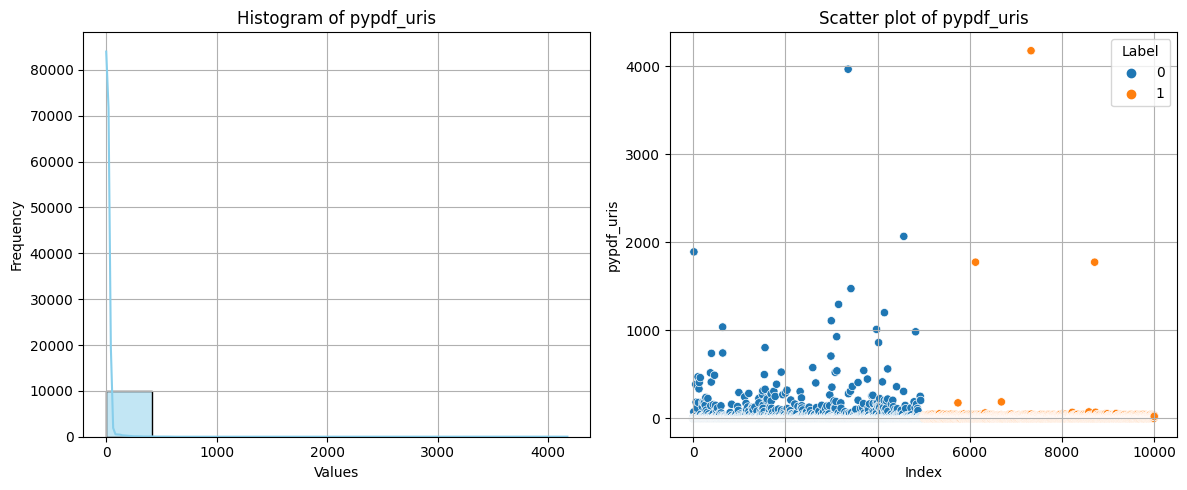

In [30]:
#plot 2 subplots corresponding to the second column that is pypdf_uris.
#The first is a basic histogram.
#The next are the data points plotted with their respective labels.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of the Second Column
sns.histplot(ax=axes[0], data=df.iloc[:, 1], bins=10, kde=True, color='skyblue')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of pypdf_uris')
axes[0].grid(True)

# All datapoints Scatter plot
sns.scatterplot(ax=axes[1], x=df.index, y=df.iloc[:, 1], hue=df.iloc[:, -1])
axes[1].set_xlabel('Index')
axes[1].set_ylabel('pypdf_uris')
axes[1].set_title('Scatter plot of pypdf_uris')
axes[1].legend(title='Label')
axes[1].grid(True)

plt.tight_layout()
plt.show()

It can be seen through the above 2 plots, that on the basis of pypdf_uris there is a clear demarcation of the maliciousness of the file. Hence this feature should be quite important during classification.

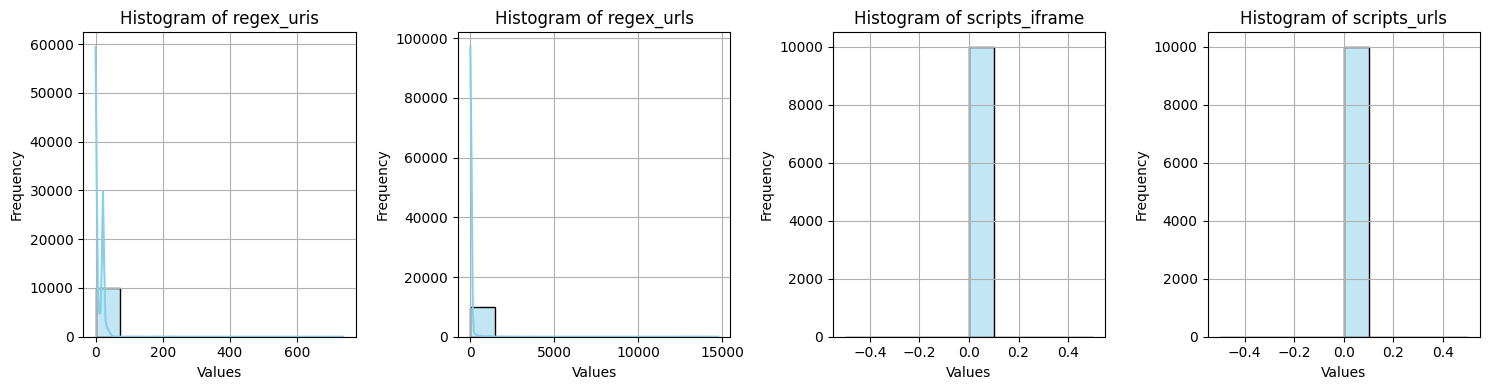

In [31]:
# Select columns 3 to 6 for plotting histograms
columns_to_plot = df.iloc[:, 2:6].columns

num_cols = len(columns_to_plot)
fig, axes = plt.subplots(1, num_cols, figsize=(15, 4))

for i, col in enumerate(columns_to_plot):
    sns.histplot(ax=axes[i], data=df[col], bins=10, kde=True, color='skyblue')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

It can be seen that regex_uris and regex_urls also have similar distributions. Hence, they should also have a good contribution in classifying the data.

scripts_iframe and scripts_urls are consistent throughout.

## Model

In [51]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score

In [31]:
df = pd.read_csv('cleaned_combined_featuresV2.csv') #dataframe

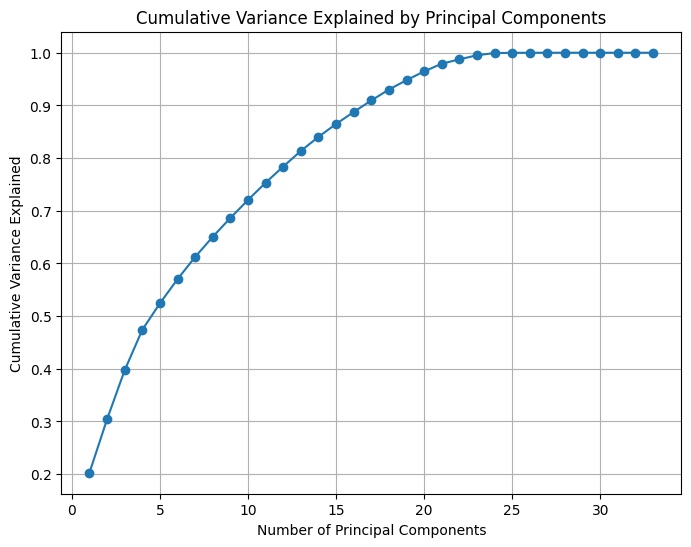

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df.drop(columns=['label']),
    df['label'], 
    test_size=0.25,
    random_state=701 #Test Train split with size = 0.25
)

scaler = StandardScaler() #Scaling
X_train = scaler.fit_transform(X_train) #Apply scaling to train and test
X_test = scaler.transform(X_test)

principal=PCA(random_state = 42) #Apply PCA to data
principal.fit_transform(X_train)

#plot showing variance explained vs components
explained_variances_ratio = principal.explained_variance_ratio_
cumulative_variance_ratio = explained_variances_ratio.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

In [33]:
pca=PCA(n_components = 23, random_state = 42) #pick the component that explains almost all variability
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [34]:
#Using KFold Split find the best hyperparameters for criterion="gini"
n_list = []
scores_list = []

for i in range(1, 101):
    n_list.append(i)
    model = RandomForestClassifier(n_estimators= i, criterion="gini", random_state=42)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, Y_train, cv=kfold)
    scores_list.append(scores.mean())

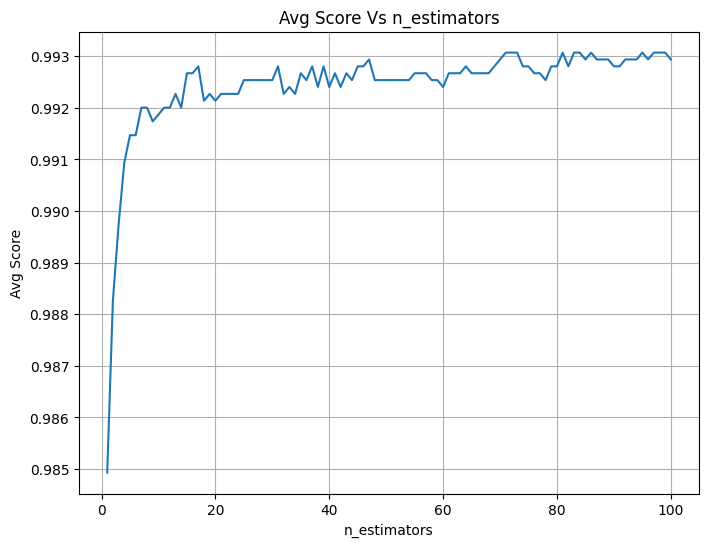

In [35]:
#plot showing the variation of accuracy and n_estimators
plt.figure(figsize=(8, 6))
plt.plot(n_list, scores_list)
plt.title('Avg Score Vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Avg Score')
plt.grid()
plt.show()

In [36]:
index_gini = scores_list.index(max(scores_list))
print(n_list[index_gini])
max(scores_list) #Find the max value and its corresponding index

71


0.9930666666666668

In [37]:
#Using KFold Split find the best hyperparameters for criterion="entropy"
n_list = []
scores_list = []

for i in range(1, 101):
    n_list.append(i)
    model = RandomForestClassifier(n_estimators= i, criterion="entropy", random_state=42)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, Y_train, cv=kfold)
    scores_list.append(scores.mean())

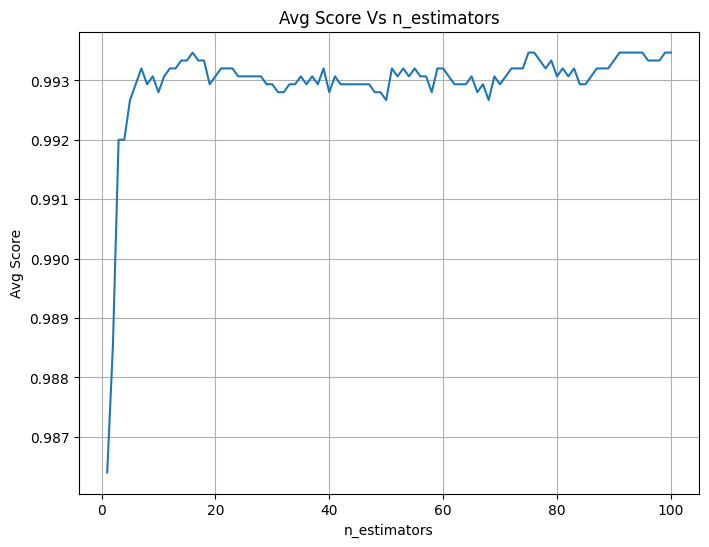

In [38]:
#plot showing the variation of accuracy and n_estimators
plt.figure(figsize=(8, 6))
plt.plot(n_list, scores_list)
plt.title('Avg Score Vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Avg Score')
plt.grid()
plt.show()

In [39]:
index = scores_list.index(max(scores_list))
print(n_list[index])
max(scores_list) #Find the max value and its corresponding index

16


0.9934666666666667

In [40]:
classifier= RandomForestClassifier(n_estimators= n_list[index_gini], criterion="gini", random_state = 42)  
classifier.fit(X_train, Y_train) #Fit the model using ideal hyperparameters
y_pred= classifier.predict(X_test)
cm= confusion_matrix(Y_test, y_pred)
cm #confusion matrix

array([[1266,    0],
       [  12, 1222]], dtype=int64)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1266
           1       1.00      0.99      1.00      1234

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500

False Positive Rate: 0.0 %
Detection Rate: 99.02755267423015 %


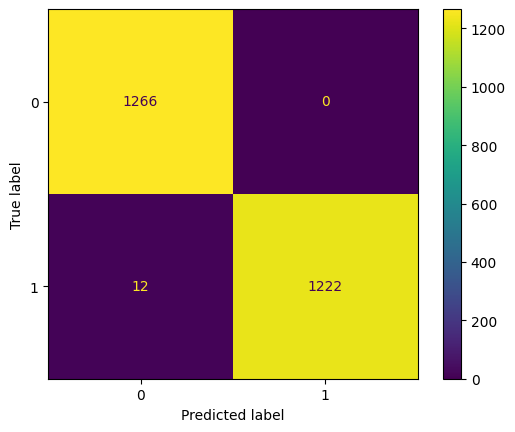

In [41]:
report = classification_report(Y_test, y_pred) #Classification Report
print(report)

TN = cm[0, 0]
FP = cm[0, 1] 

FPR = FP / (FP + TN) #False Positive Rate

print("False Positive Rate:", FPR*100,'%')

TP = cm[1, 1]
FN = cm[1, 0] 

TPR = TP / (TP + FN) #True Positive Rate

print("Detection Rate:", TPR*100,'%')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = classifier.classes_)
disp.plot() #Display the confusion matrix
plt.show()

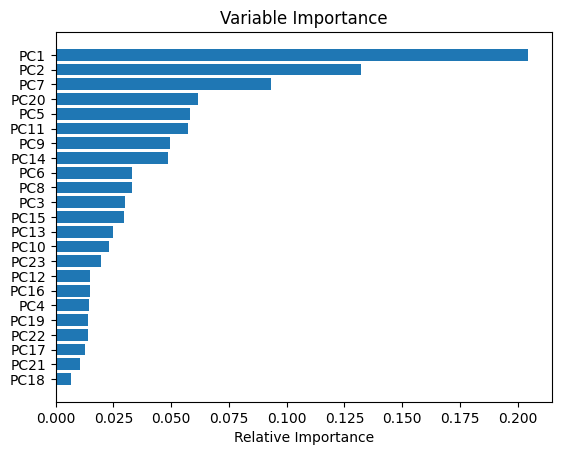

In [47]:
#find which features were the most important during classification
importance = classifier.feature_importances_
sorted_idx = np.argsort(importance)

pca_list = []
for i in range(1,24):
    pca_list.append(f'PC{i}')
pca_list = np.array(pca_list)
padding = np.arange(len(pca_list)) + 0.5
plt.barh(padding, importance[sorted_idx], align='center')
plt.yticks(padding, pca_list[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

Since PCA was performed, we have the importance of the principal components in classification.

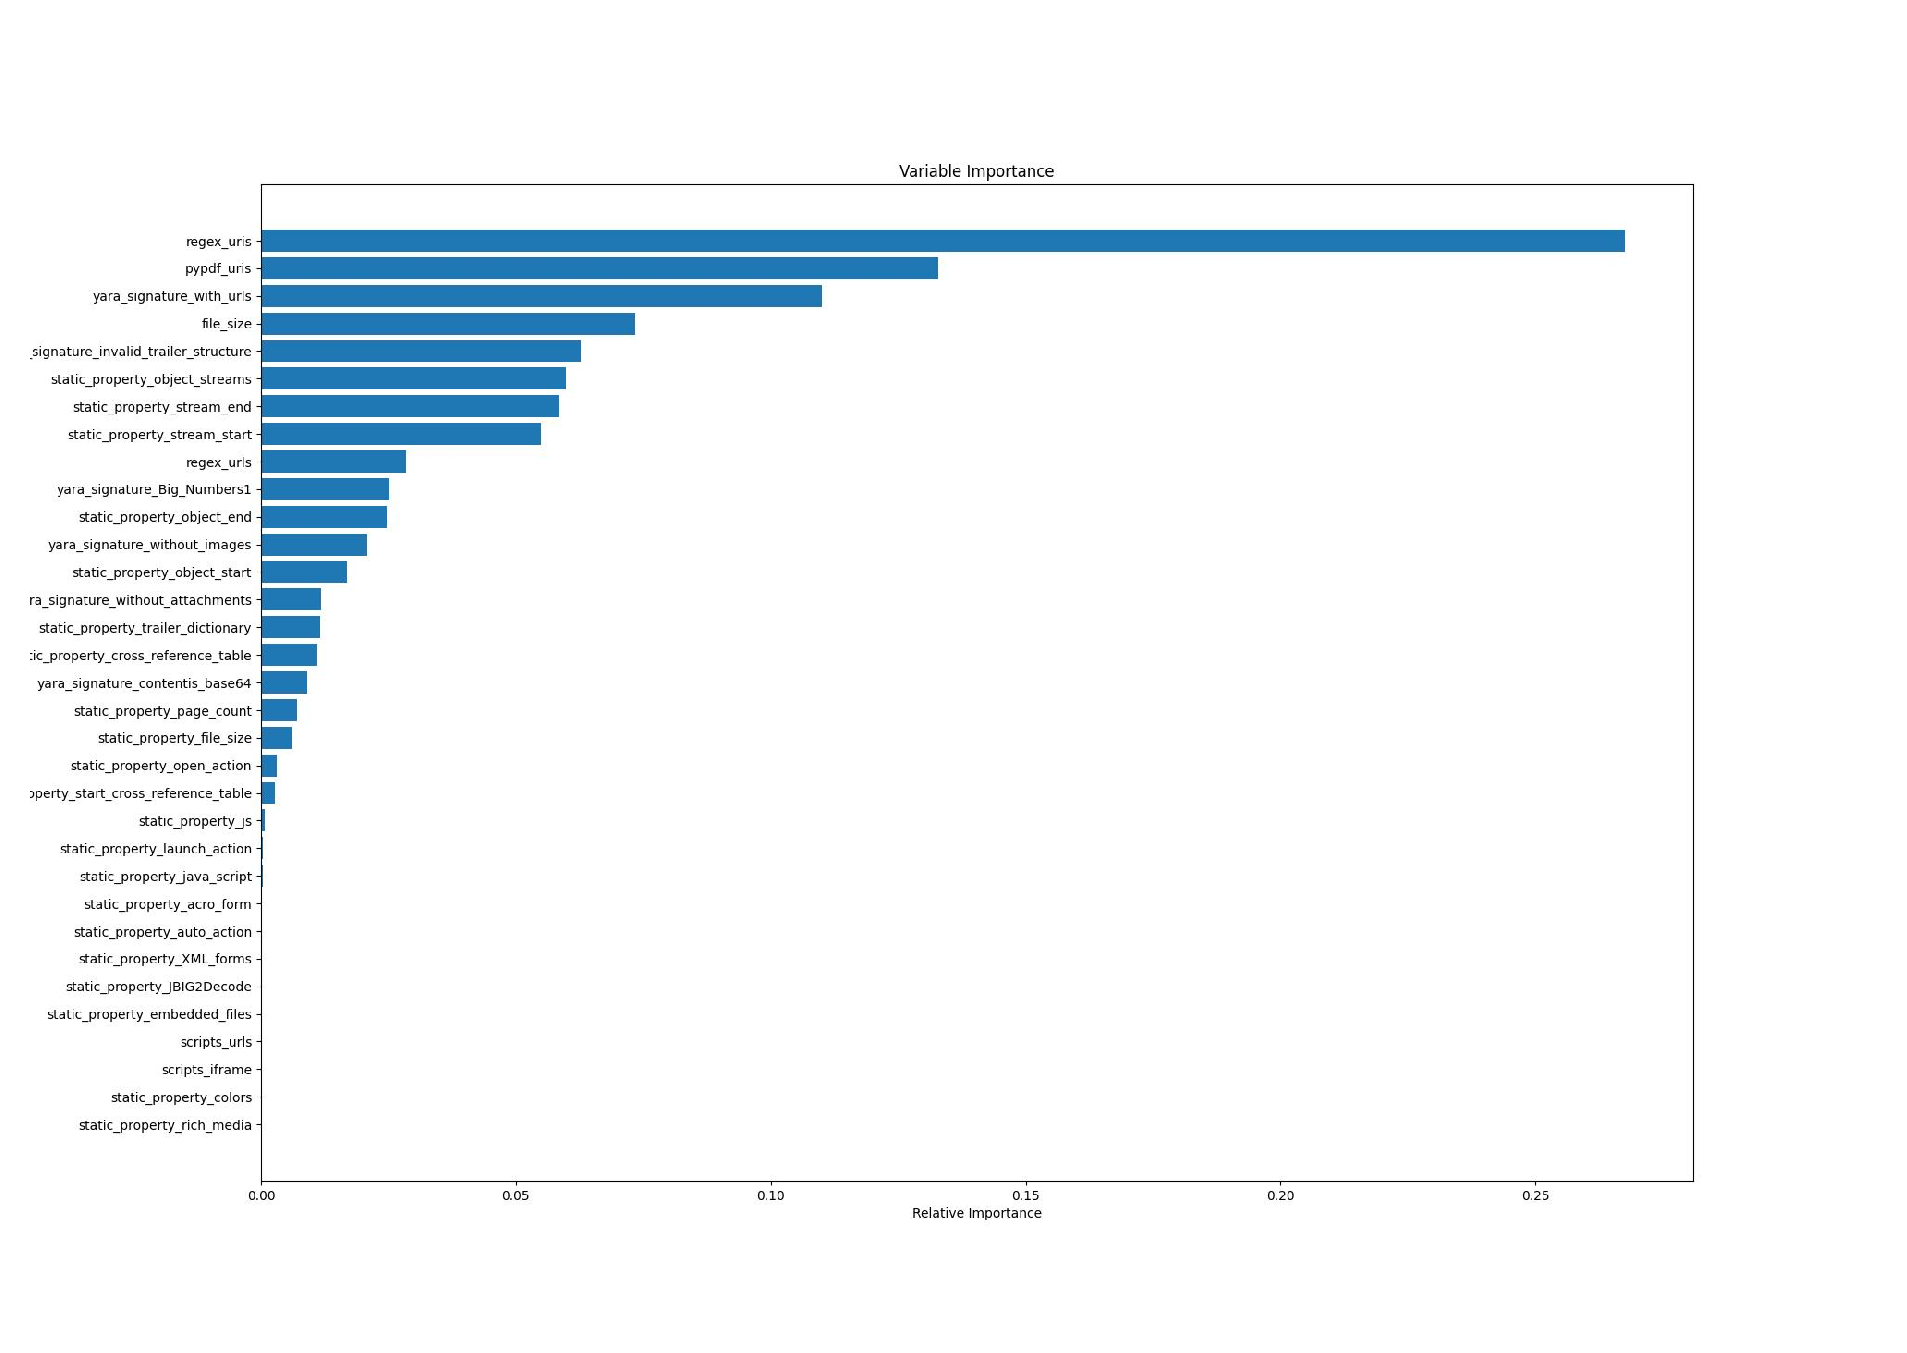

In [48]:
#find the actual important features
from PIL import Image
img = Image.open('variable_importance_plot.jpg')
display_width = 8
dpi = 300
aspect_ratio = img.width / img.height
display_height = display_width / aspect_ratio

plt.figure(figsize=(display_width, display_height), dpi=dpi)
plt.imshow(img, interpolation='nearest')
plt.axis('off')
plt.show()

Importance of the actual features

In [42]:
y_pred_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob, pos_label=1)
roc_auc = roc_auc_score(Y_test, y_pred_prob) 
roc_auc #area under curve for the ROC curve

0.9992693202854355

In [44]:
print('DR vs FP with Thresholds')

for tp, fp, thr in zip(tpr, fpr, thresholds):
    print(f'{100*tp:>6.3f}%', f'{100*fp:10.4f}%', f'{thr:15.4f}') #DR vs FP with their corresponding thresholds

DR vs FP with Thresholds
 0.000%     0.0000%             inf
92.707%     0.0000%          1.0000
93.031%     0.0000%          0.9883
94.895%     0.0000%          0.9859
94.976%     0.0000%          0.9831
95.462%     0.0000%          0.9812
95.543%     0.0000%          0.9793
96.029%     0.0000%          0.9718
96.110%     0.0000%          0.9695
96.272%     0.0000%          0.9648
96.921%     0.0000%          0.9577
97.407%     0.0000%          0.9014
97.893%     0.0000%          0.8310
98.217%     0.0000%          0.7746
98.379%     0.0000%          0.6901
98.622%     0.0000%          0.6479
99.028%     0.0000%          0.5352
99.190%     0.0000%          0.4930
99.271%     0.0790%          0.4789
99.352%     0.0790%          0.4648
99.514%     0.0790%          0.4085
99.676%     0.0790%          0.3521
99.676%     0.6319%          0.1925
99.757%     0.8689%          0.1831
99.757%     0.9479%          0.1643
99.757%     1.2638%          0.1549
99.757%     1.4218%          0.1408
99.

In [53]:
print('Ideal Threshold: ', 0.3521) #Ideal Threshold
print('Ideal FP: ', 0.0790,'%') #Ideal FP
print('Ideal DR: ', 99.676,'%') #Ideal DR

Ideal Threshold:  0.3521
Ideal FP:  0.079 %
Ideal DR:  99.676 %


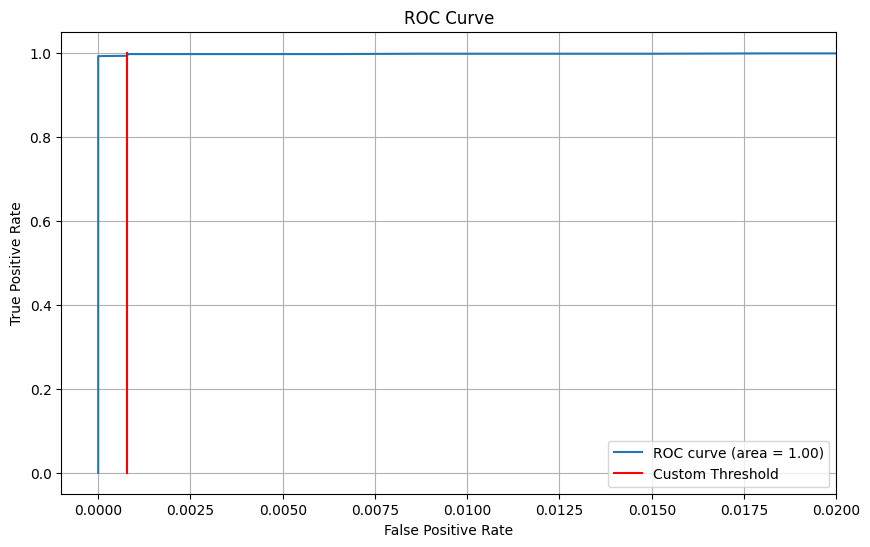

In [49]:
#ROC curve plot
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
range1 = np.linspace(0,1, 100)
plt.plot(np.ones(100)*0.000790, range1, color = 'red', label = 'Custom Threshold')
plt.xlim(-0.001, 0.02)
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.grid()
plt.show()